In [2]:
from paint import *

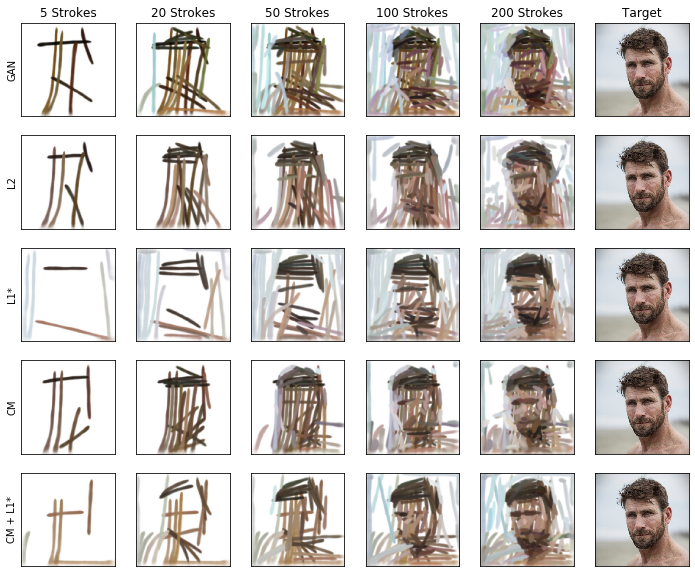

In [10]:
output_stroke_inds = [5, 20, 50, 100, 200]

renderer_fn = 'renderer_constrained.pkl'

actor_fns = [
             'pretrained_models/gan/actor.pkl',
             'pretrained_models/l2/actor.pkl',
             'pretrained_models/l1/actor.pkl',
             'pretrained_models/cm/actor.pkl',
             'pretrained_models/cml1/actor.pkl'
            ]
labels = ['GAN', 'L2', 'L1*', 'CM', 'CM + L1*']

fn = 'image/neisley/1.jpg'

target = cv2.imread(fn, cv2.IMREAD_COLOR)

all_canvas_progress = []
for actor_fn in actor_fns:
    all_canvas_progress.append(paint(actor_fn=actor_fn, renderer_fn=renderer_fn, \
                                     max_step=int(output_stroke_inds[-1]/5)+1, img=fn, \
                                     div=1, discrete_colors=False)[2])
    
n_rows = len(all_canvas_progress)
n_cols = len(output_stroke_inds)

fig, ax = plt.subplots(n_rows, n_cols+1, figsize=(2*(n_cols+1), 2*n_rows))

for i in range(n_rows):
    for j in range(n_cols):
        if j==0: ax[i, j].set_ylabel(labels[i])
        ax[i, j].imshow(all_canvas_progress[i][output_stroke_inds[j]])
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        if i == 0: ax[i, j].set_title(str(output_stroke_inds[j]) + ' Strokes')
    
    ax[i, n_cols].imshow(target[...,::-1])
    ax[i, n_cols].set_xticks([])
    ax[i, n_cols].set_yticks([])
    if i == 0: ax[i, n_cols].set_title('Target')
plt.show()